## WHO API

In [1]:
import requests;

url     = "https://covid-19-coronavirus-statistics.p.rapidapi.com/v1/stats";
query   = {"country":"Mexico"};
headers = {
    'x-rapidapi-host': "covid-19-coronavirus-statistics.p.rapidapi.com",
    'x-rapidapi-key': "7e6cf1dbafmsha291e24ccb65407p1469b1jsn307b9be6aeef"
};

response = requests.request("GET", url, headers=headers, params=query);
print(response.text);

{"error":false,"statusCode":200,"message":"OK","data":{"lastChecked":"2020-04-06T01:06:19.519Z","covid19Stats":[{"city":"","province":"","country":"Mexico","lastUpdate":"2020-04-05 23:06:26","keyId":"Mexico","confirmed":1890,"deaths":79,"recovered":633}]}}


---
##### https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
---

## 'Our World in Data' data compilation
#### Sourced from the World Health Organization (WHO) Situation Reports
##### https://ourworldindata.org/coronavirus
##### https://ourworldindata.org/coronavirus-source-data; https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
##### https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports/

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [3]:
# PYTHON LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import dateparser
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
# import tqdm
import warnings
warnings.filterwarnings('ignore')

from adjustText import adjust_text
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
# from tqdm import tnrange, tqdm_notebook

# CONSTANTS
markerSymbol = [
    "o", #circle
    "v", #triangle_down
    "^", #triangle_up
    "<", #triangle_left
    ">", #triangle_right
    "s", #square
    "p", #pentagon
    "P", #plus (filled)
    "*", #star
    "H", #hexagon2
    "X", #x (filled)
    "D", #diamond
    "d", #thin_diamond
    "1", #tri_down
    "2", #tri_up
    "3", #tri_left
    "4", #tri_right
    "+", #plus
    "x"  #x
];

markerColour = [
    '#f44336', #red
    '#e91e63', #pink
    '#9c27b0', #purple
    '#673ab7', #deep-purple
    '#3f51b5', #indigo
    '#2196f3', #blue
    '#03a9f4', #light-blue
    '#00bcd4', #cyan
    '#009688', #teal
    '#4caf50', #green
    '#8bc34a', #light-green
    '#cddc39', #lime
    '#ffeb3b', #yellow
    '#ffc107', #amber
    '#ff9800', #orange
    '#ff5722', #deep-orange
    '#795548', #brown
    '#9e9e9e'  #grey
];

# df.loc[<ROWS RANGE> , <COLUMNS RANGE>] to get elements by index

# https://vac-lshtm.shinyapps.io/ncov_tracker/
url_confirmed = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv";
df_confirmed_raw = pd.read_csv(url_confirmed, delimiter=",");
display("CONFIRMED", df_confirmed_raw.head())

url_deaths = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv";
df_deaths_raw = pd.read_csv(url_deaths, delimiter=",");
display("DEATHS", df_deaths_raw.head())

url_recovered = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv";
df_recovered_raw = pd.read_csv(url_recovered, delimiter=",");
display("RECOVERED", df_recovered_raw.head())

'CONFIRMED'

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


'DEATHS'

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,6,6,7,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,8,10,10,11,15,15,16,17,20,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,26,29,31,35,44,58,86,105,130,152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,6,8,12,14,15,16,17,18
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2


'RECOVERED'

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,2,2,5,5,10,10,10,15
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,33,44,52,67,76,89,99,104
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,29,31,31,37,46,61,61,62,90,90
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,10,10,10,10,16,21,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2,2


In [4]:
def joinstr(x):
    if x != '': return ' - ';
    else:       return '';

def formatdate(x):
    res = x.split('/')
    res[0] = "%02d" % (int(res[0]),); # month
    res[1] = "%02d" % (int(res[1]),); # day
    res[2] = res[2]; # year
    return('-'.join(res));

def explodeDF(df_raw):
    # Remove NANs
    df_raw = df_raw.replace(np.nan, '');

    # Concatenate "Country/Region" & "Province/State" tp make the location column
    df_raw['Location'] = df_raw[["Country/Region", "Province/State"]].apply(
        # Add a " - " if the "Province/State" exists 
        lambda x: joinstr(x["Province/State"]).join(x), axis=1
    );

    # Remove unnecessary columns
    df_raw = df_raw.drop(columns=['Lat', 'Long', 'Province/State', 'Country/Region']);

    # Make the "Location" column to be the first column
    location = df_raw['Location'];
    df_raw.drop(labels=['Location'], axis=1,inplace = True);
    df_raw.insert(0, 'Location', location);
    
#     # let's take a look to the data
#     display("PROCESSED DATA", df_raw.head());

    # Build the plotable df
    date     = list(df_raw.columns);
    location = list(df_raw['Location']);
    df       = pd.DataFrame(columns=["Location", "date", "counts"]);
    
    # Explode the data frame
#     for i in range(len(location)):
    for i in tqdm(range(len(location))):
        for j in range(len(date)):
            if j > 0:
                df = df.append({
                    "Location": location[i],
                    "date":     date[j],
                    "counts":   df_raw[date[j]][i]
                }, ignore_index=True);
                
    # Sum all Provinces/States of one country
    # Get countries that are divided into several Provinces/States
    allcountries = location
    dividedCountries = [];
    for location in allcountries:
        if " - " in location:
            country = location.split(" - ")[0]
            if not(country in dividedCountries) and not(country in allcountries):
                dividedCountries.append(country)

#     # Let's take a look
#     display(dividedCountries)
    
    for country in dividedCountries:
        # Get rows that contain a specific country
        row = df_raw[df_raw['Location'].str.contains(country)]

        # Get totals for each date (column)
        row = pd.DataFrame(row.sum())

        # Add a column containing the dates
        row['date'] = date
        
        # Remove the first row, generated by .sum()
        row = row.drop('Location')
        
        # Add a column containing the country name
        row['Location'] = [country] * len(row)
        
        # Remane the '0' column as it contains the totals, calculated by .sum()
        row = row.rename(columns={0: "counts"})
        
        # Reorder the columns to match the previous data
        row = row[['Location','date','counts']]
        
        # Append the calculated totals to the existing data
        df = df.append(row);
        
        # Give each row a unique index/ID. df.index = range(len(df.index))
        df.index = df[["Location", "date"]].apply(
            # Add a " - " if the "Province/State" exists
            lambda x: joinstr(x["Location"]).join(x), axis=1
        );

#         # Let's take a look
#         display(row.head())

#     # let's take a look to the data
#     display("PROCESSED DATA", df.head());
#     df.to_csv(r'./_data_.csv', index = False);

    return df;

In [5]:
# Explode the original data
print("Exploding the original data ...");
df_confirmed_explode = explodeDF(df_confirmed_raw);
df_deaths_explode    = explodeDF(df_deaths_raw);
df_recovered_explode = explodeDF(df_recovered_raw);

# # let's take a look to the data
# df_confirmed_explode.to_csv(r'./df_confirmed_explode.csv', index = False);
# df_deaths_explode.to_csv(r'./df_deaths_explode.csv', index = False);
# df_recovered_explode.to_csv(r'./df_recovered_explode.csv', index = False);
# display("PROCESSED DATA", df_confirmed_explode.head());
# display("PROCESSED DATA", df_deaths_explode.head());
# display("PROCESSED DATA", df_recovered_explode.head());

# Build the plotable dataframe with columns from several datasets
print("Building the dataset ...");
df_raw = pd.DataFrame();
df_raw = pd.concat([df_raw, df_confirmed_explode['Location']], axis=1, sort=False)
df_raw = pd.concat([df_raw, df_confirmed_explode['date']], axis=1, sort=False)
df_raw = pd.concat([df_raw, df_confirmed_explode['counts']], axis=1, sort=False)
df_raw = df_raw.rename(columns={"counts": "confirmed"})
df_raw = pd.concat([df_raw, df_deaths_explode['counts']], axis=1, sort=False)
df_raw = df_raw.rename(columns={"counts": "deaths"})
df_raw = pd.concat([df_raw, df_recovered_explode['counts']], axis=1, sort=False)
df_raw = df_raw.rename(columns={"counts": "recovered"})

# Build the plotable dataframe with CALCULATED columns
# Calculate active cases
print("Calculating active cases ...")
df_raw['active'] = df_raw['confirmed'] - df_raw['deaths'] - df_raw['recovered'];

# Calculate new cases, deaths and recoveries per day
print("Calculating new cases, deaths and recoveries per day ...")
df_raw['new_confirmed'] = np.NaN;
df_raw['new_deaths']    = np.NaN;
df_raw['new_recovered'] = np.NaN;
df_raw['new_active']    = np.NaN;
currentLocation = '';
for i in tqdm(range(len(df_raw))):
    if currentLocation != df_raw['Location'][i]:
#         print(df_raw['Location'][i]);
        df_raw['new_confirmed'][i] = 0;
        df_raw['new_deaths'][i]    = 0;
        df_raw['new_recovered'][i] = 0;
        df_raw['new_active'][i]    = 0;
        currentLocation = df_raw['Location'][i];
    else:
        df_raw['new_confirmed'][i] = df_raw['confirmed'][i] - df_raw['confirmed'][i - 1];
        df_raw['new_deaths'][i]    = df_raw['deaths'][i]    - df_raw['deaths'][i - 1];
        df_raw['new_recovered'][i] = df_raw['recovered'][i] - df_raw['recovered'][i - 1];
        df_raw['new_active'][i]    = df_raw['active'][i]    - df_raw['active'][i - 1];

# Format the date column
print("Formatting the dates ...")
date = list(df_raw['date'])
date = [str(dateparser.parse(x)) for x in date]
df_raw['date'] = date

# Save the dataframe as CSV
df_raw.to_csv(r'./data.csv', index = False);

# let's take a look to the data
display("PROCESSED DATA", df_raw.head());

Exploding the original data ...



Building the dataset ...
Calculating active cases ...
Calculating new cases, deaths and recoveries per day ...



Formatting the dates ...


'PROCESSED DATA'

,Location,date,confirmed,deaths,recovered,active,new_confirmed,new_deaths,new_recovered,new_active
Afghanistan - 1/22/20,Afghanistan,2020-01-22 00:00:00,0,0,0,0,0.0,0.0,0.0,0.0
Afghanistan - 1/23/20,Afghanistan,2020-01-23 00:00:00,0,0,0,0,0.0,0.0,0.0,0.0
Afghanistan - 1/24/20,Afghanistan,2020-01-24 00:00:00,0,0,0,0,0.0,0.0,0.0,0.0
Afghanistan - 1/25/20,Afghanistan,2020-01-25 00:00:00,0,0,0,0,0.0,0.0,0.0,0.0
Afghanistan - 1/26/20,Afghanistan,2020-01-26 00:00:00,0,0,0,0,0.0,0.0,0.0,0.0


### Load data from saved CSV to spare processing time ...

In [6]:
df_raw.to_csv(r'./data.csv', index = False);
url_confirmed = "./data.csv";
df_raw = pd.read_csv(url_confirmed, delimiter=",");
display("CONFIRMED", df_raw.head())

'CONFIRMED'

,Location,date,confirmed,deaths,recovered,active,new_confirmed,new_deaths,new_recovered,new_active
0,Afghanistan,2020-01-22 00:00:00,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2020-01-23 00:00:00,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-01-24 00:00:00,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2020-01-25 00:00:00,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2020-01-26 00:00:00,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### https://vac-lshtm.shinyapps.io/ncov_tracker/
---

### Print all countries

In [7]:
print('; '.join(df_raw.iloc[:]['Location'].drop_duplicates().sort_values()))
allcountries = df_raw.iloc[:]['Location'].drop_duplicates().sort_values()

Afghanistan; Albania; Algeria; Andorra; Angola; Antigua and Barbuda; Argentina; Armenia; Australia; Australia - Australian Capital Territory; Australia - New South Wales; Australia - Northern Territory; Australia - Queensland; Australia - South Australia; Australia - Tasmania; Australia - Victoria; Australia - Western Australia; Austria; Azerbaijan; Bahamas; Bahrain; Bangladesh; Barbados; Belarus; Belgium; Belize; Benin; Bhutan; Bolivia; Bosnia and Herzegovina; Botswana; Brazil; Brunei; Bulgaria; Burkina Faso; Burma; Burundi; Cabo Verde; Cambodia; Cameroon; Canada; Canada - Alberta; Canada - British Columbia; Canada - Diamond Princess; Canada - Grand Princess; Canada - Manitoba; Canada - New Brunswick; Canada - Newfoundland and Labrador; Canada - Northwest Territories; Canada - Nova Scotia; Canada - Ontario; Canada - Prince Edward Island; Canada - Quebec; Canada - Recovered; Canada - Saskatchewan; Canada - Yukon; Central African Republic; Chad; Chile; China; China - Anhui; China - Beij

### function to plot the number of 'new_cases', 'new_deaths', 'total_cases' or 'total_deaths' per country

In [8]:
def covid19plot(y_str, countries, legPos='upper left', logScale=False, annotations=True):
    # Assign a numeric value to string data type values
    df_num = df_raw.copy();
    for col in range(len(df_raw.columns)):
        if str(type(df_raw.iloc[0 , col])) == "<class 'str'>":
            df_num.iloc[: , col] = number.fit_transform(df_raw.iloc[: , col].astype('str'))

    # Define x axis as the date axis
    x_str = 'date'; x_units = r'$[Y-M-D]$';
    y_units = r'$[No. cases]$';

    # Get the string and numeric values in one df
    df_fil = pd.DataFrame(df_raw);
    df_fil = df_fil.join(
        pd.DataFrame(
            df_num.iloc[:]['Location']
        ).rename(
            columns={"Location": "LocationID"}
        )
    );

    # PLOT SETUP
    scale = 7;
    fig   = plt.figure(figsize=(3*scale, 2*scale));
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.tight_layout();

    reffontsize = 16;

    # Stablish the plot area
    ax0 = plt.gca()

    if logScale:
        plt.yscale('log');
        # plt.xscale('log');

    texts_ax0 = [];
    for c in countries:
        for ystr in y_str:
            ## Remove NANs from interesting x,y data
            #df_fil = df_fil.dropna(subset=[x_str, ystr]);

            # Extract data from a specific country
            df_county = df_fil[df_fil.Location.isin([c])]
            if logScale:
                df_county = df_county[df_county[ystr] > 0]

            x = df_county.iloc[:]['date'];
            x = [datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S").date() for d in x]
            y = df_county.iloc[:][ystr];

            # Extract country details
            locName   = df_county.iloc[:]['Location'];
            locColour = df_county.iloc[:]['LocationID'];

            # Plot each point individually to give each a defined color according to its related polymer
            ci_col    = 0;
            eleCount  = 0;
            stringCnt = '';
            leny      = len(y);
            try:
                maxy = max(y);
            except ValueError:
                maxy = 0;
            for xi, yi, ci, ni in zip(x, y, locColour, locName):
                # add data points
                ci_col = ci%len(markerColour)
                ci_sym = ci%len(markerSymbol)
                ax0.scatter(xi, yi, s=32, label=ni, c=markerColour[ci_col], marker=markerSymbol[ci_sym]);

                if annotations:
                    # add annotations (references on each point)
                    eleCount = eleCount + 1;
                    stryi = str(yi) + ystr + ':' + c;
                    #if ((yi==maxy) or (eleCount==len(y))) and not(stryi in stringCnt) and (yi > 0):
                    if (eleCount==len(y)) and not(stryi in stringCnt) and (yi > 0):
                        # Add text annotations to the axes
                        print(stryi)
                        texts_ax0.append(ax0.text(xi, yi, stryi, fontsize=reffontsize));
                        stringCnt = stringCnt + stryi + ', ';

                # Plot a curve to join the data points
                plt.plot(x, y, color=markerColour[ci_col])

    # avoid overlaps between annotations and add a linking line
    kwargs = dict(transform=ax0.transAxes);
    adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);

    # Show the plot lengend to link colors and polymer names
    handles, labels = ax0.get_legend_handles_labels();
    lgd = dict(zip(labels, handles));

    locator = mdates.AutoDateLocator();#minticks=20, maxticks=24)
    formatter = mdates.ConciseDateFormatter(locator)
    ax0.xaxis.set_major_locator(locator)
    ax0.xaxis.set_major_formatter(formatter)

    fig.autofmt_xdate();
#     ax0.set_xlabel(x_str + '    ' + x_units, fontsize=24);
#     ax0.set_ylabel(y_str[0], fontsize=24);

    ax0.spines['top'].set_visible(False);
    ax0.spines['right'].set_visible(False);

    # Display main plot
    if len(countries)<26: plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc=legPos);
    plt.savefig('plt_' + x_str.replace(" ", "") + '_vs_' + y_str[0].replace(" ", "") + '.png', dpi=200, bbox_inches='tight');
    plt.show();
    mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---

1178.0active:Mexico
3260.0active:India
34887.0active:Iran
2548.0active:Japan
5584.0active:Norway
310005.0active:US
80925.0active:Spain
91246.0active:Italy
2062.0active:China
3591.0active:Korea, South


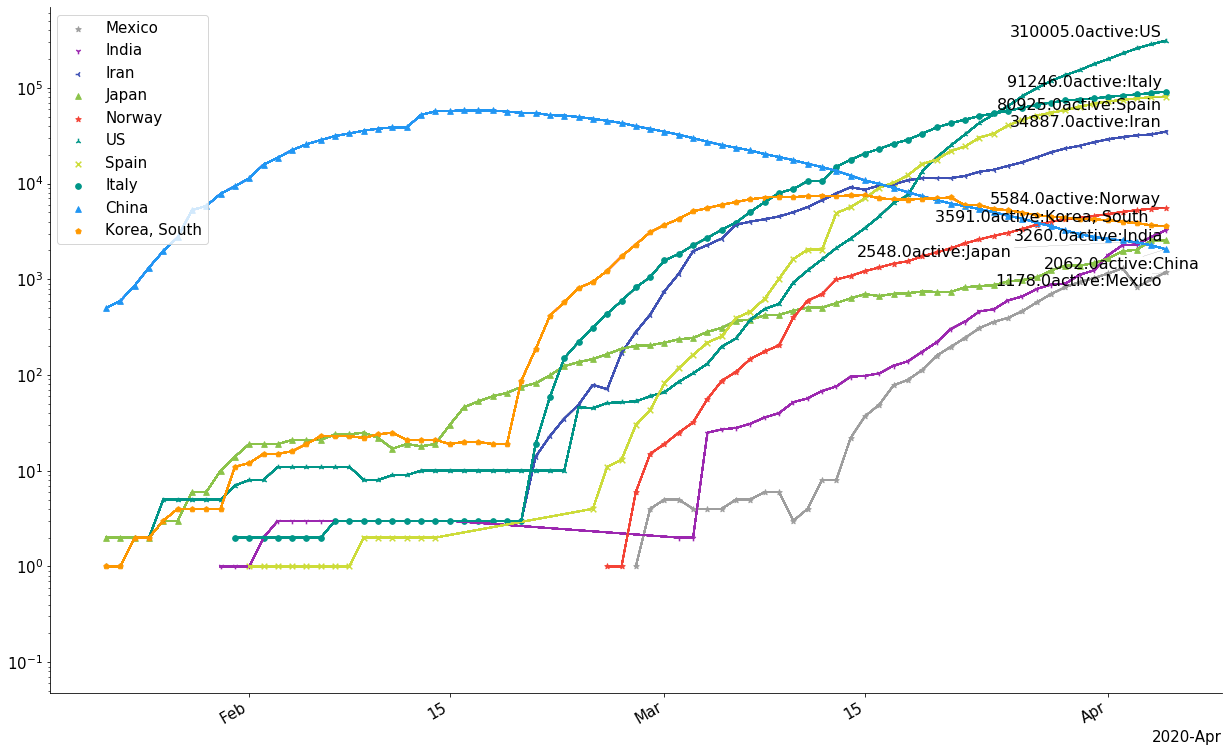

1890confirmed:Mexico
3588confirmed:India
58226confirmed:Iran
3139confirmed:Japan
5687confirmed:Norway
337072confirmed:US
131646confirmed:Spain
128948confirmed:Italy
82602confirmed:China
10237confirmed:Korea, South


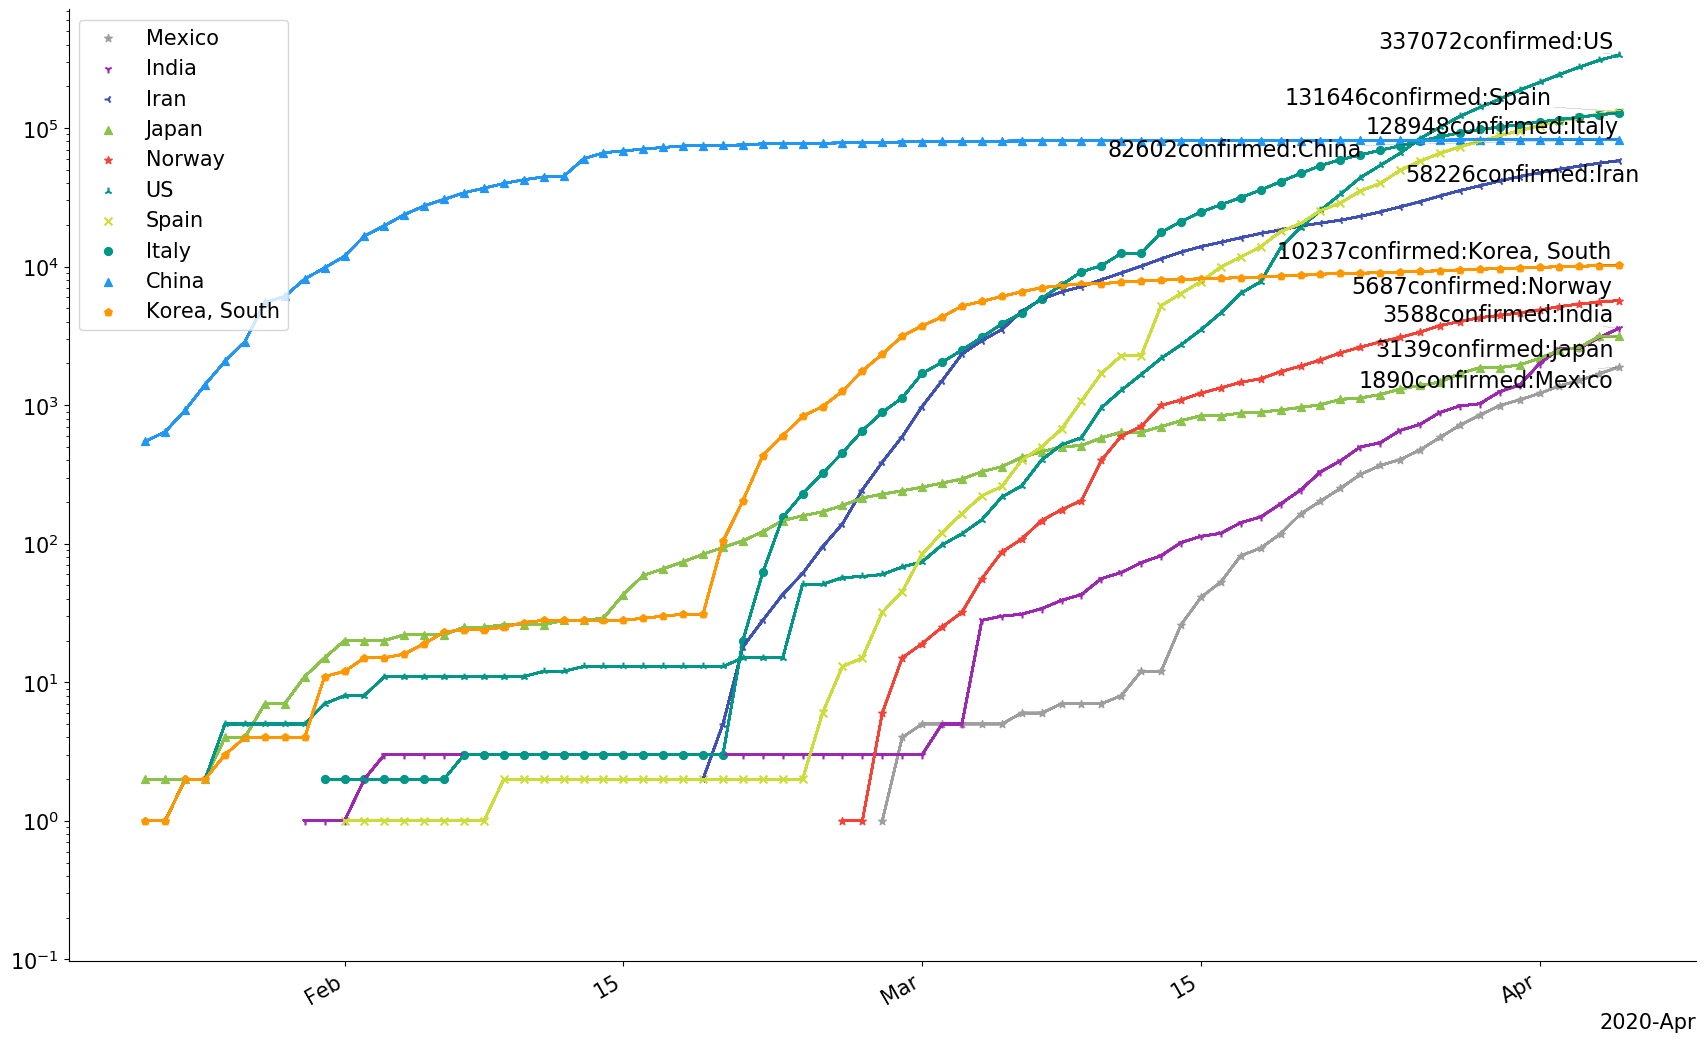

79deaths:Mexico
99deaths:India
3603deaths:Iran
77deaths:Japan
71deaths:Norway
9619deaths:US
12641deaths:Spain
15887deaths:Italy
3333deaths:China
183deaths:Korea, South


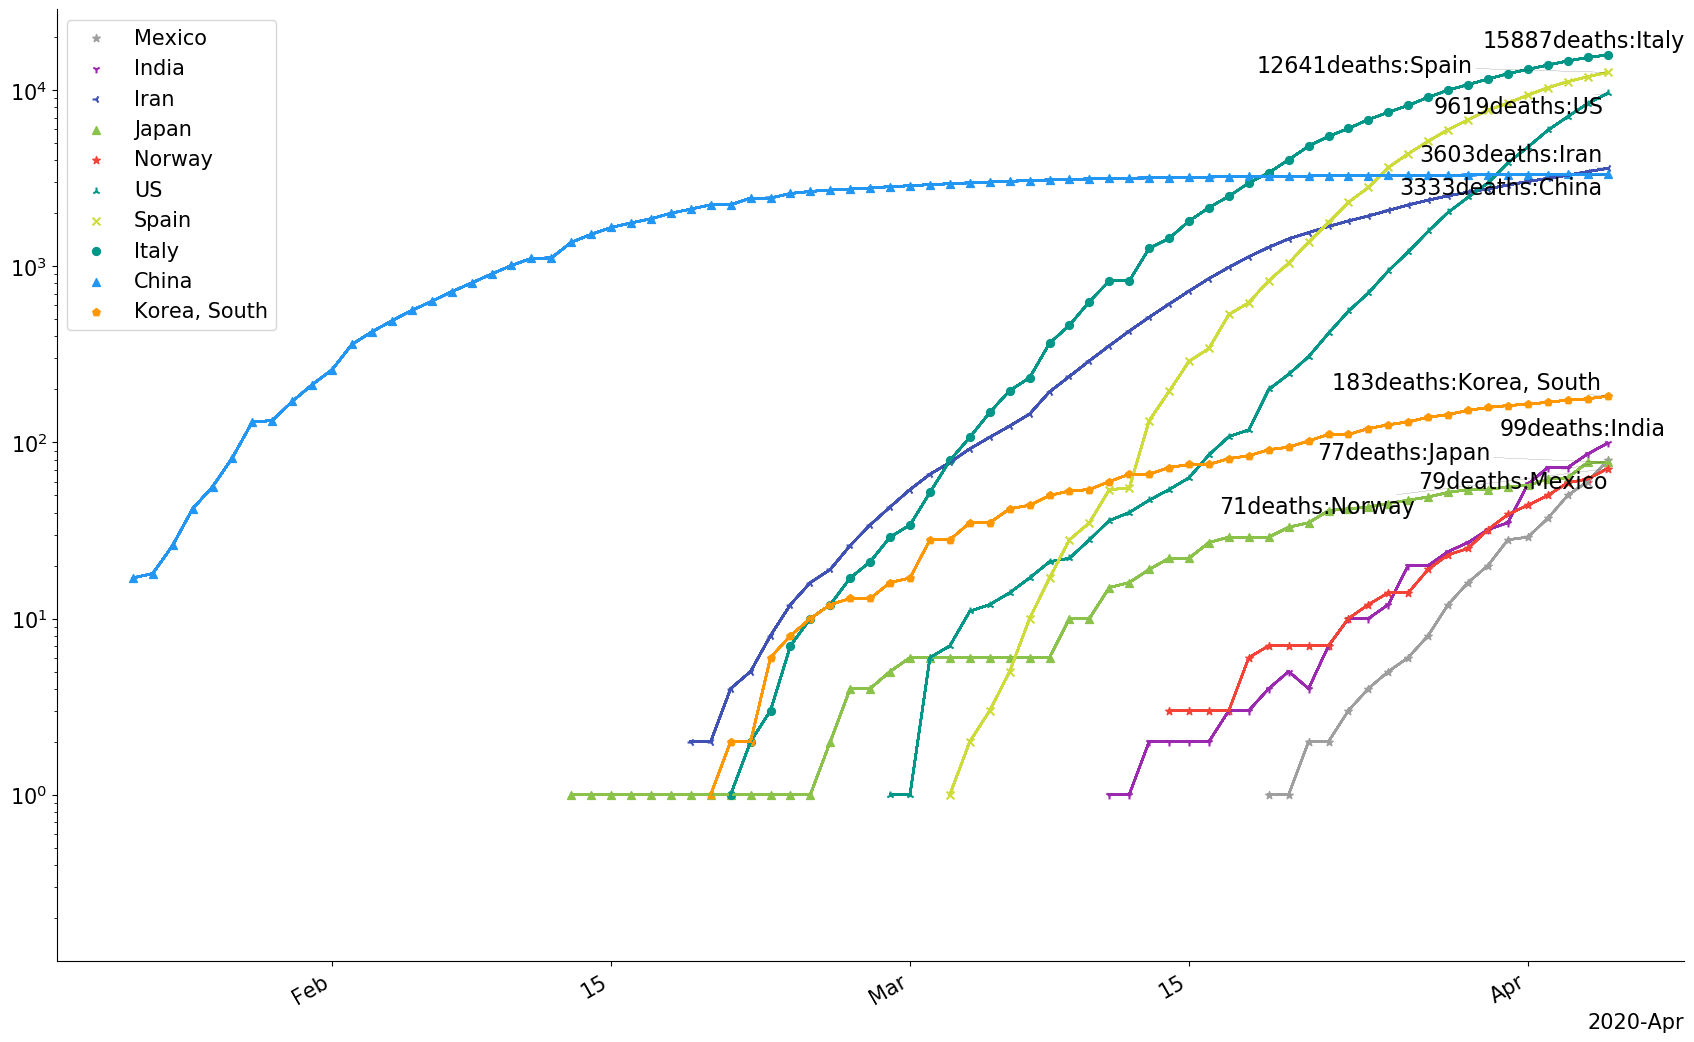

633.0recovered:Mexico
229.0recovered:India
19736.0recovered:Iran
514.0recovered:Japan
32.0recovered:Norway
17448.0recovered:US
38080.0recovered:Spain
21815.0recovered:Italy
77207.0recovered:China
6463.0recovered:Korea, South


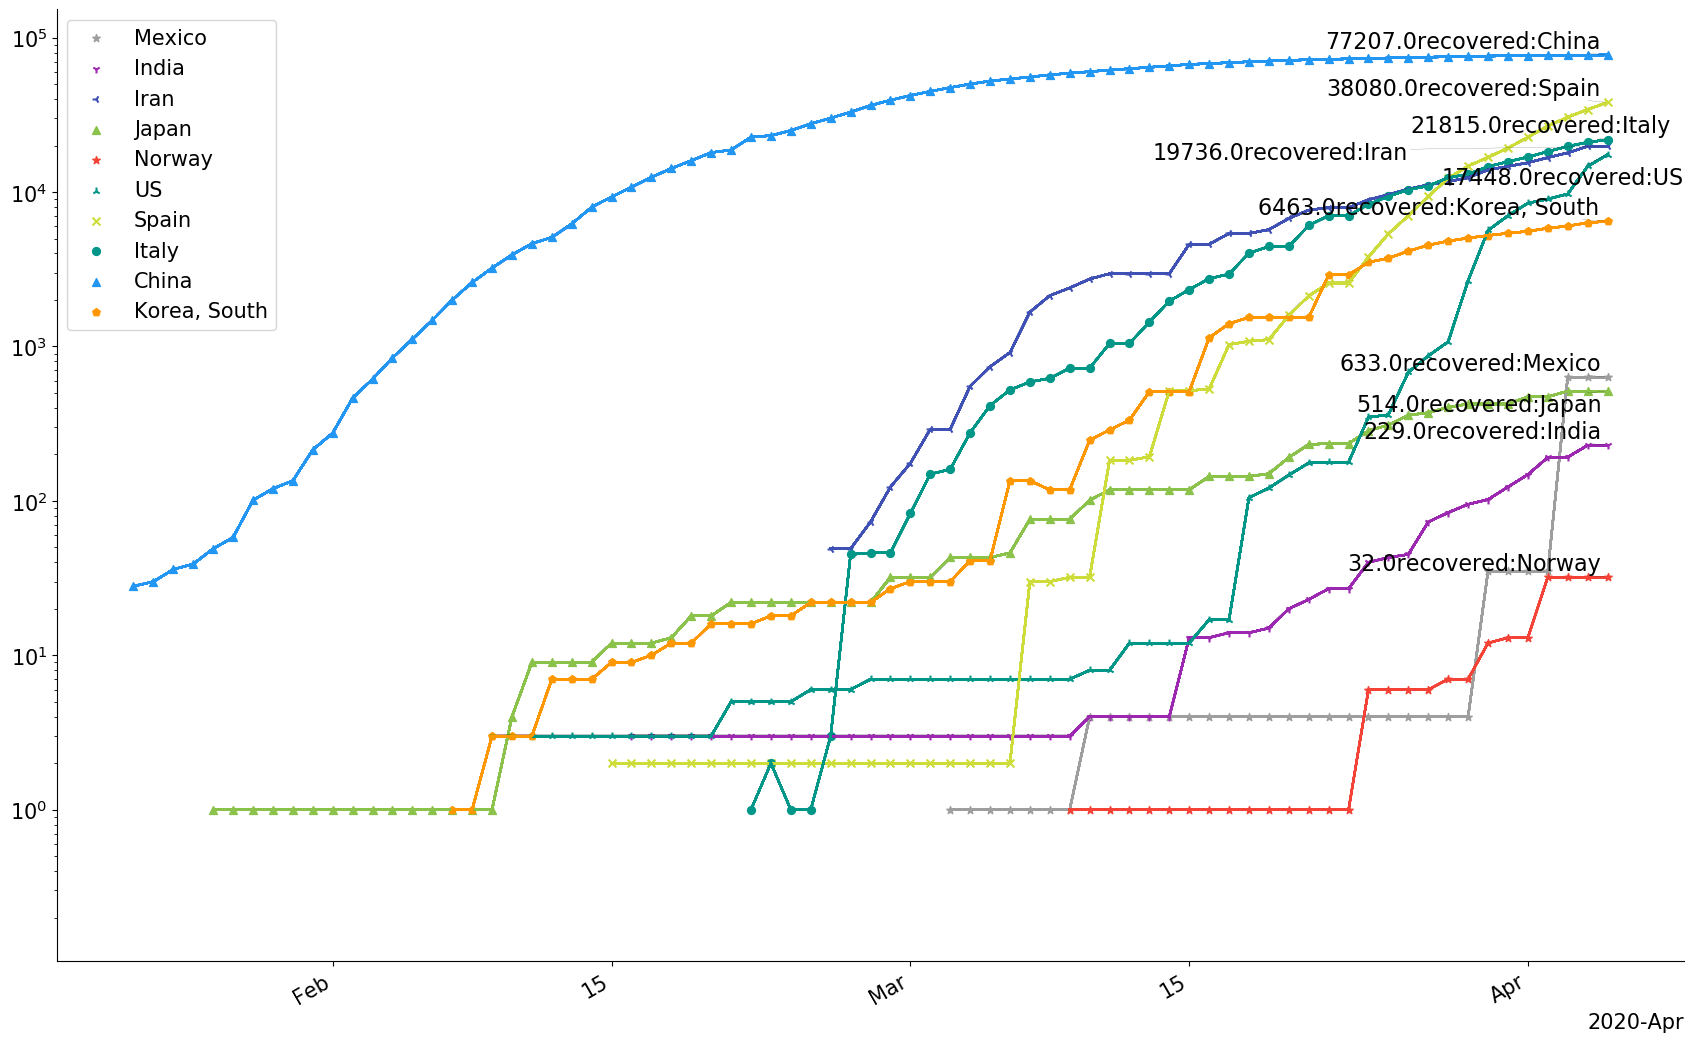

In [9]:
y_str       = [["active"], ["confirmed"], ["deaths"], ["recovered"]];
countries   = ['Mexico','India','Iran','Japan','Norway','US', 'Spain', 'Italy','China','Korea, South'];
legPos      = "upper left";
logScale    = True;
annotations = True;

for ystr in y_str:
    covid19plot(ystr, countries, legPos, logScale, annotations)

1178.0active:Mexico
79deaths:Mexico
633.0recovered:Mexico


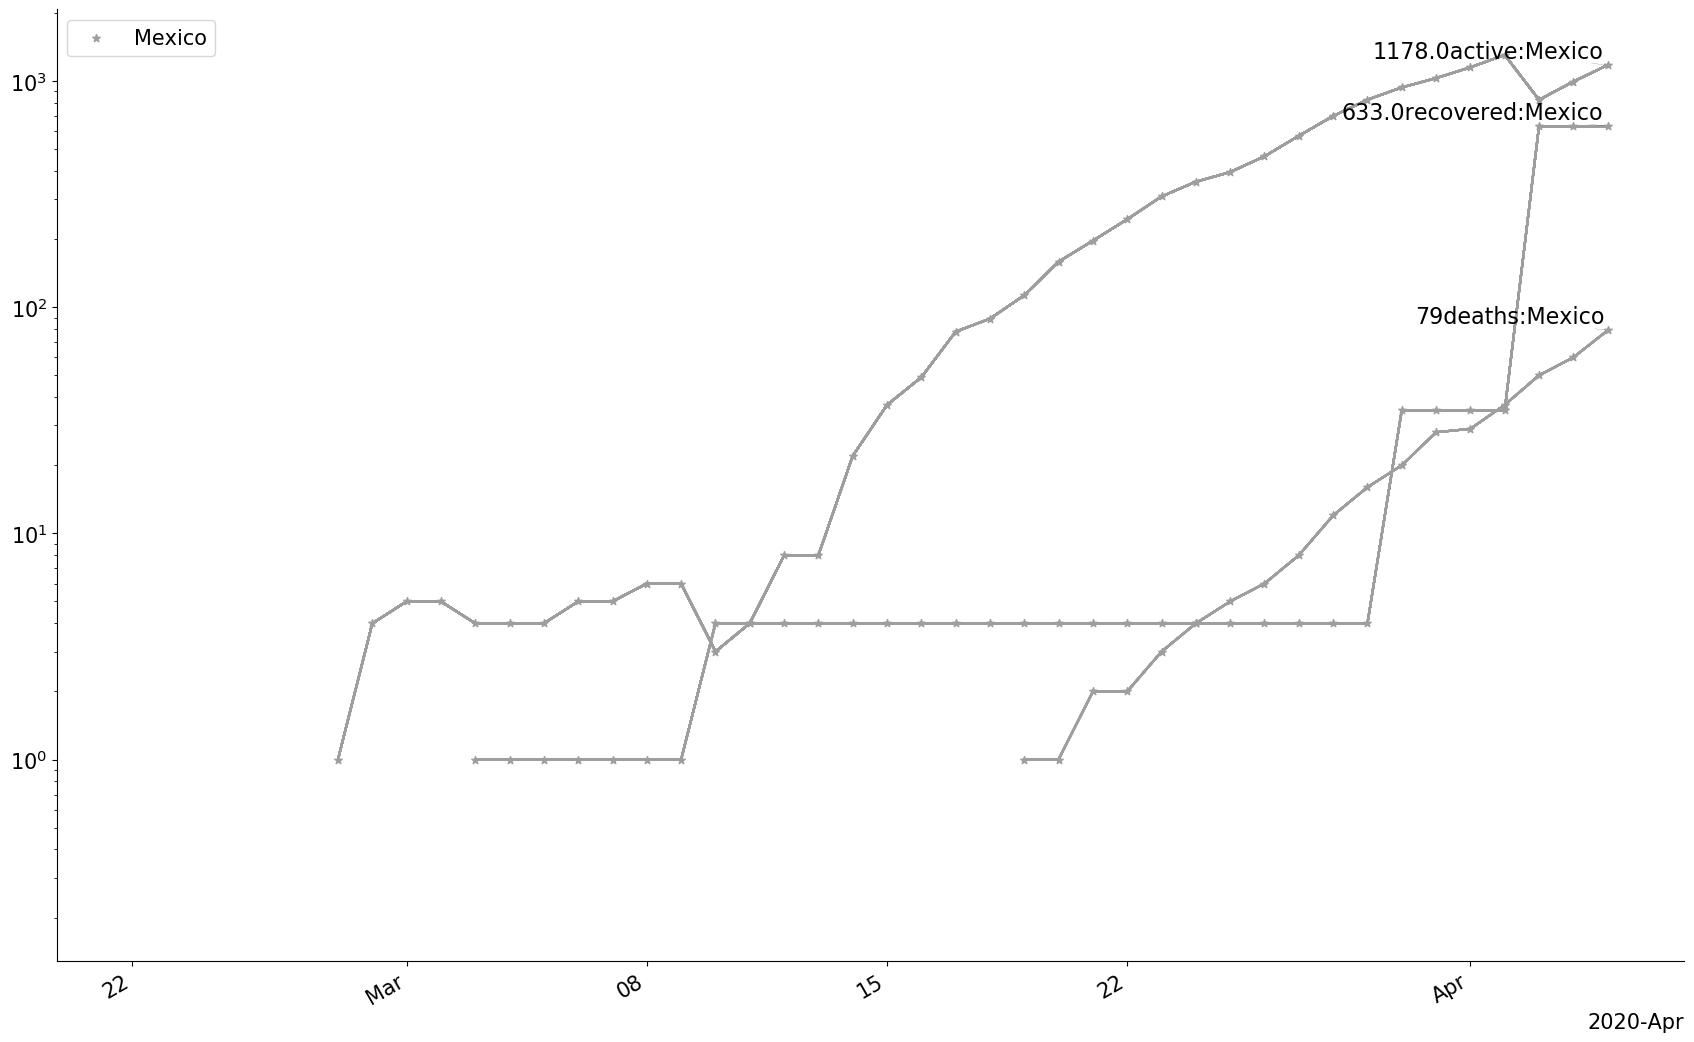

In [10]:
y_str       = ["active", "deaths", "recovered"];
countries   = ['Mexico'];
legPos      = "upper left";
logScale    = True;
annotations = True;

covid19plot(y_str, countries, legPos, logScale, annotations)

202.0new_confirmed:Mexico
183.0new_active:Mexico
19.0new_deaths:Mexico
598.0new_recovered:Mexico


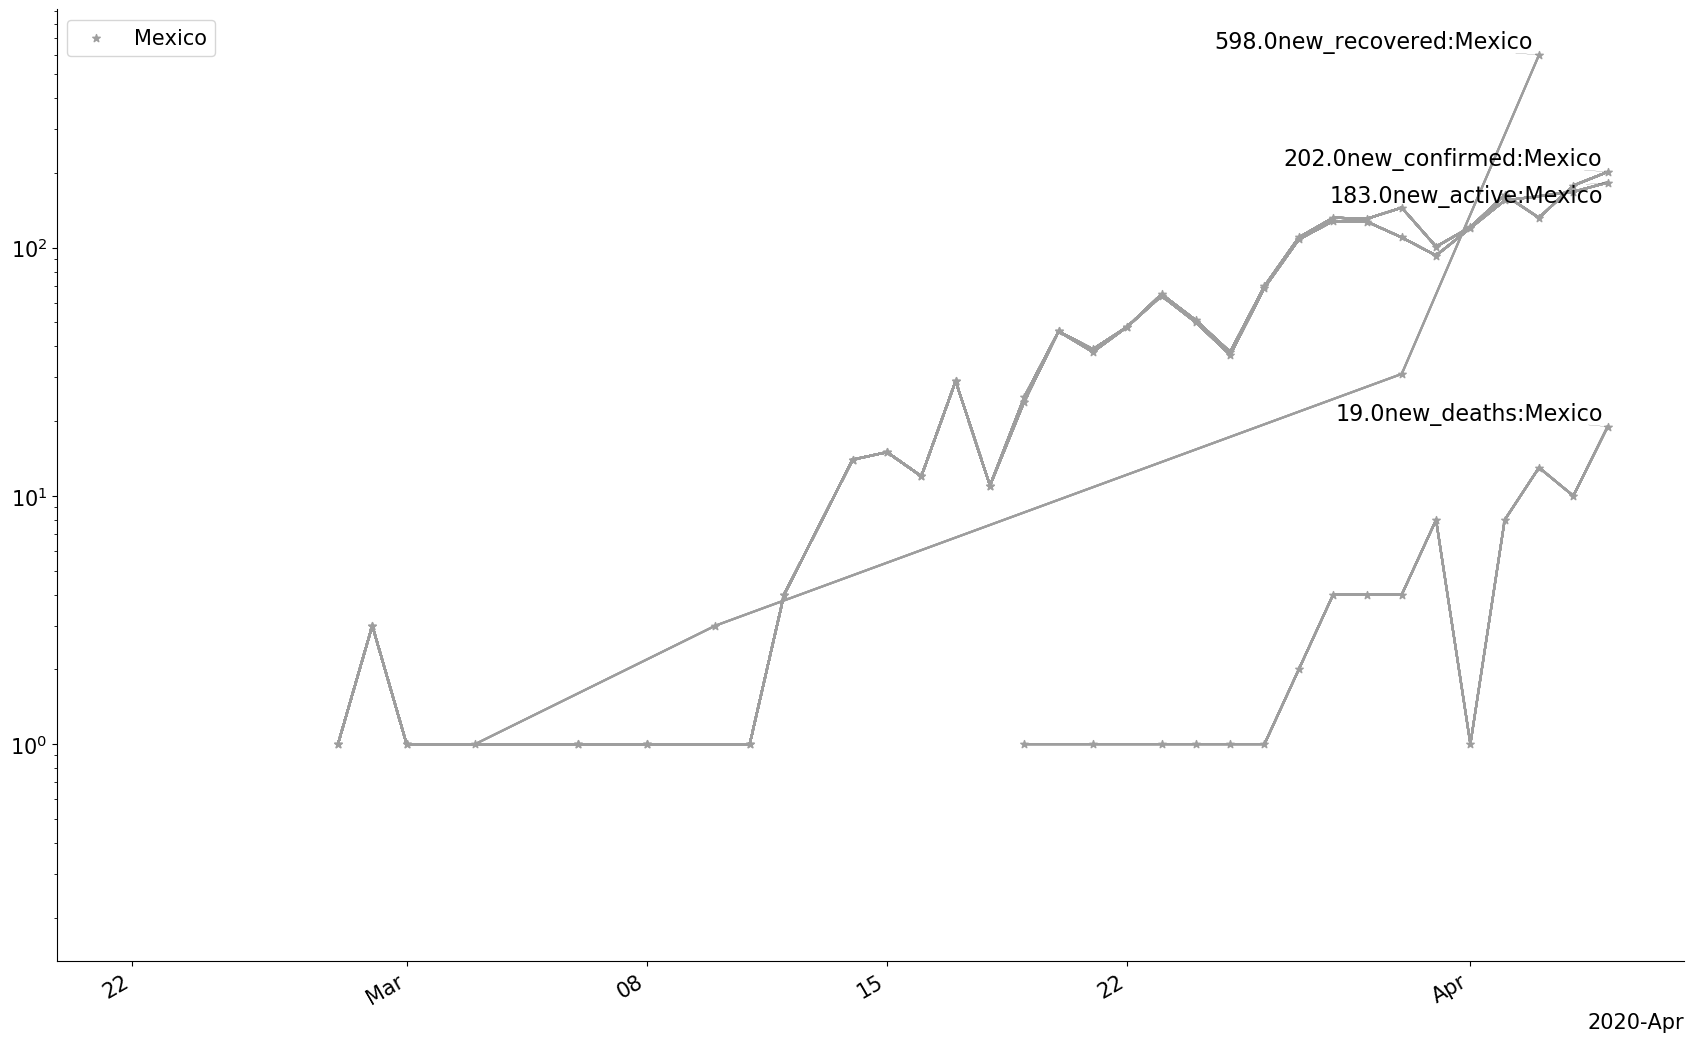

In [11]:
y_str       = ["new_confirmed", "new_active", "new_deaths", "new_recovered"];
countries   = ['Mexico'];
legPos      = "upper left";
logScale    = True;
annotations = True;

covid19plot(y_str, countries, legPos, logScale, annotations)

---